3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import env



In [ ]:
def acquire():
    # CSV file available?
    filename = 'curriculum.csv'
    # Path
    if os.path.exists(filename):
        
        return pd.read_csv(filename)
    
    else:
        url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
        query = """SELECT * FROM logs LEFT JOIN cohorts ON logs.user_id = cohorts.id"""
        df = pd.read_sql(query, url)
        
        df.to_csv(filename, index=False)
        
        return df

In [ ]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
query = """SELECT * FROM logs LEFT JOIN cohorts ON logs.user_id = cohorts.id"""
df = pd.read_sql(query, url)
# df.to_csv(cirriculum.csv, index=False)
df.head()

### Looking throuhg and understanding the data 

In [ ]:

df.path.value_counts()

In [ ]:
df.program_id.value_counts()

In [ ]:
df.shape

In [ ]:
df.user_id.value_counts

In [ ]:
df.info()

In [ ]:
#im removing staff 

In [ ]:
df.name.value_counts()

In [ ]:
df = df.loc[df["name"] != 'Staff']

In [ ]:
df.head()

In [ ]:
df= df.drop(columns= ['id', 'updated_at', 'deleted_at'])

In [ ]:
df.info()

In [ ]:
# convert dates to date time type

df['date'] = pd.to_datetime(df['date'])
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [ ]:
df.info()

In [ ]:
import prepare

In [ ]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
query = """SELECT * FROM logs LEFT JOIN cohorts ON logs.user_id = cohorts.id"""
df = pd.read_sql(query, url)
# df.to_csv(cirriculum.csv, index=False)
df.head()

In [ ]:
def prepare_data(df):
    pnames = {  1: 'Full Stack PHP',
            2: 'Full Stack Java',
            3: 'Data Science',
            4: 'Front-End'
            }
    df['program'] = df.program_id.replace(pnames)
    df=df.rename(columns={'path': 'endpoint', 'name':'cohort'})
    df=df.drop(columns=['id'])
    df.date=pd.to_datetime(df.date)
    df.start_date=pd.to_datetime(df.start_date)
    df.end_date=pd.to_datetime(df.end_date)
    df.time=pd.to_timedelta(df.time)
    df['datetime']=df.date+df.time
    df=df.set_index('datetime')
    df= df.drop(columns = ['time','deleted_at'])
    df['role'] = df['cohort'].apply(lambda x: 'staff' if x == 'staff' else 'student')
    df['endpoint']=df['endpoint'].astype(str)
    df=df.rename(columns={'date': 'access_date'})
    df['alumni']= np.where((df['access_date']>df['end_date']),'alumn','current')
    df=df.drop(columns=['access_date'])
   
    return df


In [ ]:
prepare_data(df)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn import metrics
import env
import prep

In [4]:
df=prep.acquire()

In [5]:
df = prep.prepare_data(df)

In [6]:
# Split end point into pages and subpages (query)
df['endpoint']=df['endpoint'].astype(str)
df = pd.concat([df,  df.endpoint.apply(prep.parse_request)], axis=1)

In [7]:
#Show dataframe
df

,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,role,alumni,page,query
datetime,,,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full Stack PHP,student,alumn,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full Stack PHP,student,alumn,java-ii,
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full Stack PHP,student,alumn,java-ii,object-oriented-programming
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full Stack PHP,student,alumn,slides,object_oriented_programming
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,conditionals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,jquery/personal-site,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,Full Stack Java,student,alumn,jquery,personal-site
2021-04-21 16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,Full Stack Java,student,alumn,jquery,mapbox-api
2021-04-21 16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,Full Stack Java,student,alumn,jquery,ajax


# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [8]:
active_students_df = df.loc[df["alumni"] != 'alumn']

#removing the alumni

In [9]:
active_students_df

,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,role,alumni,page,query
datetime,,,,,,,,,,,,,,,,
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,conditionals
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,loops
2018-01-26 09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,conditionals
2018-01-26 09:56:48,javascript-i/functions,3,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,functions
2018-01-26 09:56:59,javascript-i/loops,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,loops
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:36:09,jquery/personal-site,869,135.0,136.50.98.51,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,2.0,Full Stack Java,student,current,jquery,personal-site
2021-04-21 16:36:34,html-css/css-ii/bootstrap-grid-system,948,138.0,104.48.214.211,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0,Full Stack Java,student,current,html-css,css-ii
2021-04-21 16:37:48,java-iii,834,134.0,67.11.50.23,Luna,#luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,2.0,Full Stack Java,student,current,java-iii,


In [ ]:
#only two programs

In [ ]:
active_students_df.program.value_counts()

In [ ]:
active_students_df.role.value_counts()

In [ ]:
active_students_df.cohort.value_counts()

In [ ]:
active_students_df.ip.value_counts()

In [ ]:
active_students_df.page.value_counts()

In [ ]:
active_students_df.shape
#looks good 

In [ ]:
active_students_df.ip.value_counts()

In [ ]:
ip_df = pd.DataFrame(active_students_df.ip.value_counts(dropna=False)).reset_index().\
                rename(columns={'index': 'ip', 'ip': 'count'})
ip_df.head()

In [ ]:
# calculate probabity for each ip 

# ip_prob = count for each ip / total count in the dataframe

ip_df2 = pd.DataFrame((active_students_df.ip.value_counts(dropna=False))/active_students_df.ip.count()).reset_index().\
                rename(columns={'index': 'ip', 'ip': 'proba'})
ip_df2.head()


In [ ]:
ip_df = ip_df.merge(ip_df2, on='ip')
ip_df.tail(20)

In [ ]:
ip_df.head(15)

In [ ]:
ip_df.set_index('ip')['count'].sort_values()

In [ ]:
ip_df.set_index('ip')['count'].sort_values().tail(30).plot.barh(figsize=(5,5))

In [ ]:
ip_df.set_index('ip')['count'].sort_values().head(20).plot.barh(figsize=(5,5))


In [ ]:
current_ip = active_students_df.groupby(["ip"])["ip"].count()
current_ip.head(12)

In [ ]:
#what are their id's?

In [10]:
active_id = active_students_df.groupby(["user_id"])["user_id"].count()
active_id

user_id
2      1541
3      1514
4       692
5      1621
6      1313
       ... 
976      29
977      86
978      55
979     127
981      42
Name: user_id, Length: 803, dtype: int64

In [11]:
less_active_id = active_students_df.groupby(["user_id"])["user_id"].count()[active_students_df.groupby(["user_id"])["user_id"].count()<10]
less_active_id

user_id
62     4
89     3
176    3
278    4
388    8
539    5
619    1
812    7
832    3
879    1
918    1
940    1
956    6
Name: user_id, dtype: int64

In [47]:
least_active_users_df = active_students_df[active_students_df.user_id.isin(less_active_id.index)]
pd.set_option('display.max_columns', None)
least_active_users_df

#based on their user id these are all students ho have viewd their 

,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,role,alumni,page,query
datetime,,,,,,,,,,,,,,,,
2018-01-29 13:08:55,/,62,NaN,70.123.209.40,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,,
2018-01-29 13:08:57,java-ii,62,NaN,70.123.209.40,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,java-ii,
2018-01-29 13:09:01,java-iii,62,NaN,70.123.209.40,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,java-iii,
2018-01-29 13:09:14,spring,62,NaN,70.123.209.40,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,spring,
2018-02-06 09:07:47,/,89,NaN,12.43.239.98,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,,
2018-02-06 09:07:55,java-i,89,NaN,12.43.239.98,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,java-i,
2018-02-06 09:08:02,java-i/introduction-to-java,89,NaN,12.43.239.98,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,java-i,introduction-to-java
2018-05-04 13:44:51,spring/fundamentals/relationships,176,NaN,108.220.103.204,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,spring,fundamentals
2018-05-04 13:44:58,/,176,NaN,108.220.103.204,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,,


In [49]:
least_active_users_df.shape

(47, 16)

In [50]:
pd.set_option("display.max_rows", None)
least_active_users_df


,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,role,alumni,page,query
datetime,,,,,,,,,,,,,,,,
2018-01-29 13:08:55,/,62,NaN,70.123.209.40,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,,
2018-01-29 13:08:57,java-ii,62,NaN,70.123.209.40,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,java-ii,
2018-01-29 13:09:01,java-iii,62,NaN,70.123.209.40,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,java-iii,
2018-01-29 13:09:14,spring,62,NaN,70.123.209.40,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,spring,
2018-02-06 09:07:47,/,89,NaN,12.43.239.98,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,,
2018-02-06 09:07:55,java-i,89,NaN,12.43.239.98,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,java-i,
2018-02-06 09:08:02,java-i/introduction-to-java,89,NaN,12.43.239.98,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,java-i,introduction-to-java
2018-05-04 13:44:51,spring/fundamentals/relationships,176,NaN,108.220.103.204,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,spring,fundamentals
2018-05-04 13:44:58,/,176,NaN,108.220.103.204,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,student,current,,


In [51]:
least_active_users_df.role.value_counts()

student    47
Name: role, dtype: int64

<AxesSubplot:xlabel='user_id', ylabel='count'>

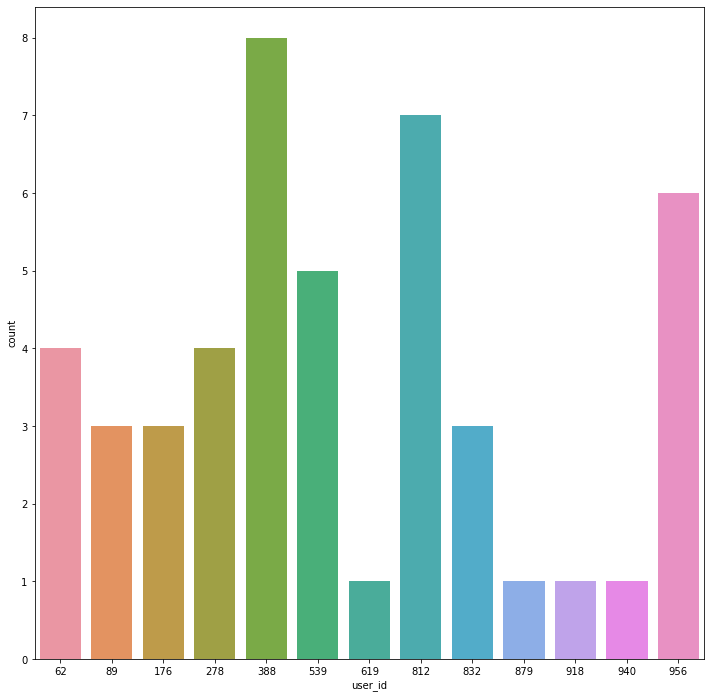

In [52]:
plt.figure(figsize=(12,12))
sns.countplot(x = least_active_users_df['user_id'])

<AxesSubplot:xlabel='cohort', ylabel='count'>

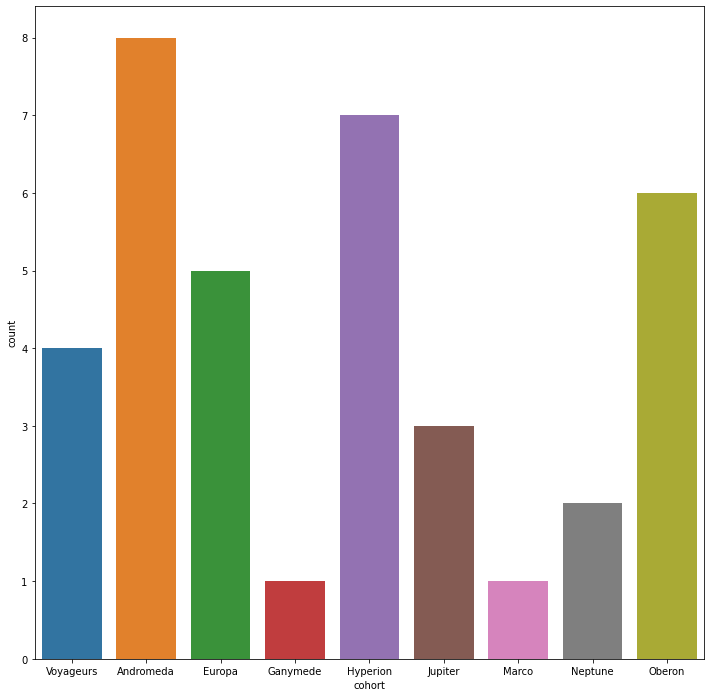

In [53]:
plt.figure(figsize=(12,12))
sns.countplot(x = least_active_users_df['cohort'])

In [ ]:
- the majority of students who do not accsesss the curriculm are students from the voyagers and hyperion 

<AxesSubplot:>

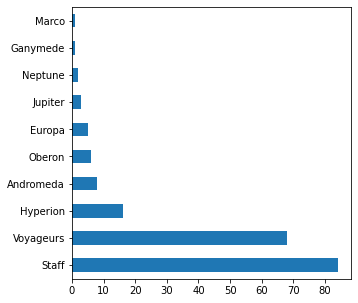

In [36]:
least_active_users_df.cohort.value_counts().plot.barh(figsize=(5,5))

In [17]:
least_active_users_df.program.value_counts()

Full Stack Java    194
Name: program, dtype: int64

<AxesSubplot:>

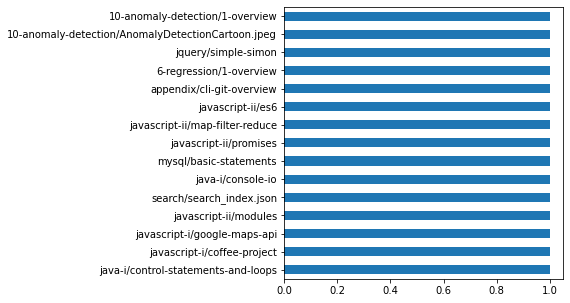

In [41]:
least_active_users_df.endpoint.value_counts().tail(15).plot.barh(figsize=(5,5))

<AxesSubplot:xlabel='user_id'>

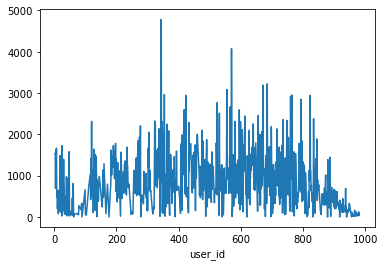

In [21]:
active_id.plot()

In [22]:
users_least_active = active_students_df.user_id.count()<10

In [23]:
users_least_active

False

In [24]:
ips_least_active = active_students_df.groupby(["ip"])["user_id"].count()[active_students_df.groupby(["ip"])["user_id"].count()<10]

In [25]:
ips_least_active

ip
103.137.12.164     9
103.208.220.130    1
103.208.220.131    1
103.208.220.132    1
103.208.220.133    1
                  ..
99.43.140.149      1
99.48.230.105      7
99.48.230.77       2
99.6.251.67        8
99.76.233.227      2
Name: user_id, Length: 2348, dtype: int64

In [26]:
least_active_students_df = df[df.ip.isin(ips_least_active.index)]
least_active_students_df

,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,role,alumni,page,query
datetime,,,,,,,,,,,,,,,,
2018-01-26 12:20:36,javascript-i/javascript-with-html,34,22.0,209.205.123.242,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,javascript-with-html
2018-01-26 12:20:41,javascript-i/functions,34,22.0,209.205.123.242,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,functions
2018-01-26 16:00:29,javascript-i/introduction/working-with-data-ty...,34,22.0,209.205.123.242,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,introduction
2018-01-26 16:00:59,javascript-i/javascript-with-html,34,22.0,209.205.123.242,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,javascript-with-html
2018-01-26 16:02:16,javascript-i/functions,34,22.0,209.205.123.242,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,functions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 14:41:08,toc,939,138.0,174.197.2.198,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0,Full Stack Java,student,current,toc,
2021-04-21 14:41:11,html-css/css-ii/bootstrap-grid-system,939,138.0,174.197.2.198,Neptune,#neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0,Full Stack Java,student,current,html-css,css-ii
2021-04-21 15:41:45,/,887,135.0,107.77.169.13,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,2.0,Full Stack Java,student,current,,


In [27]:
least_active_students_df.program.value_counts()

Full Stack Java    8749
Data Science       1995
Full Stack PHP      187
Name: program, dtype: int64

In [28]:
least_active_students_df.role.value_counts()
#just making sure i was not freaking out 

student    11619
Name: role, dtype: int64

In [29]:
#how many of the students view the cussrculum less than 10 times from each cohort 
least_active_students_df.cohort.value_counts()

Wrangell      944
Teddy         713
Zion          683
Europa        561
Darden        539
Ceres         538
Curie         508
Voyageurs     503
Sequoia       500
Ulysses       448
Easley        436
Yosemite      369
Deimos        358
Bayes         344
Jupiter       291
Andromeda     279
Betelgeuse    275
Kalypso       263
Xanadu        256
Staff         245
Fortuna       239
Ganymede      238
Luna          220
Hyperion      214
Florence      168
Bash          163
Apex          134
Marco         120
Neptune       110
Oberon         67
Kings          63
Glacier        61
Olympic        39
Pinnacles      16
Joshua         11
Arches          7
Quincy          6
Niagara         2
Name: cohort, dtype: int64

<AxesSubplot:xlabel='cohort', ylabel='count'>

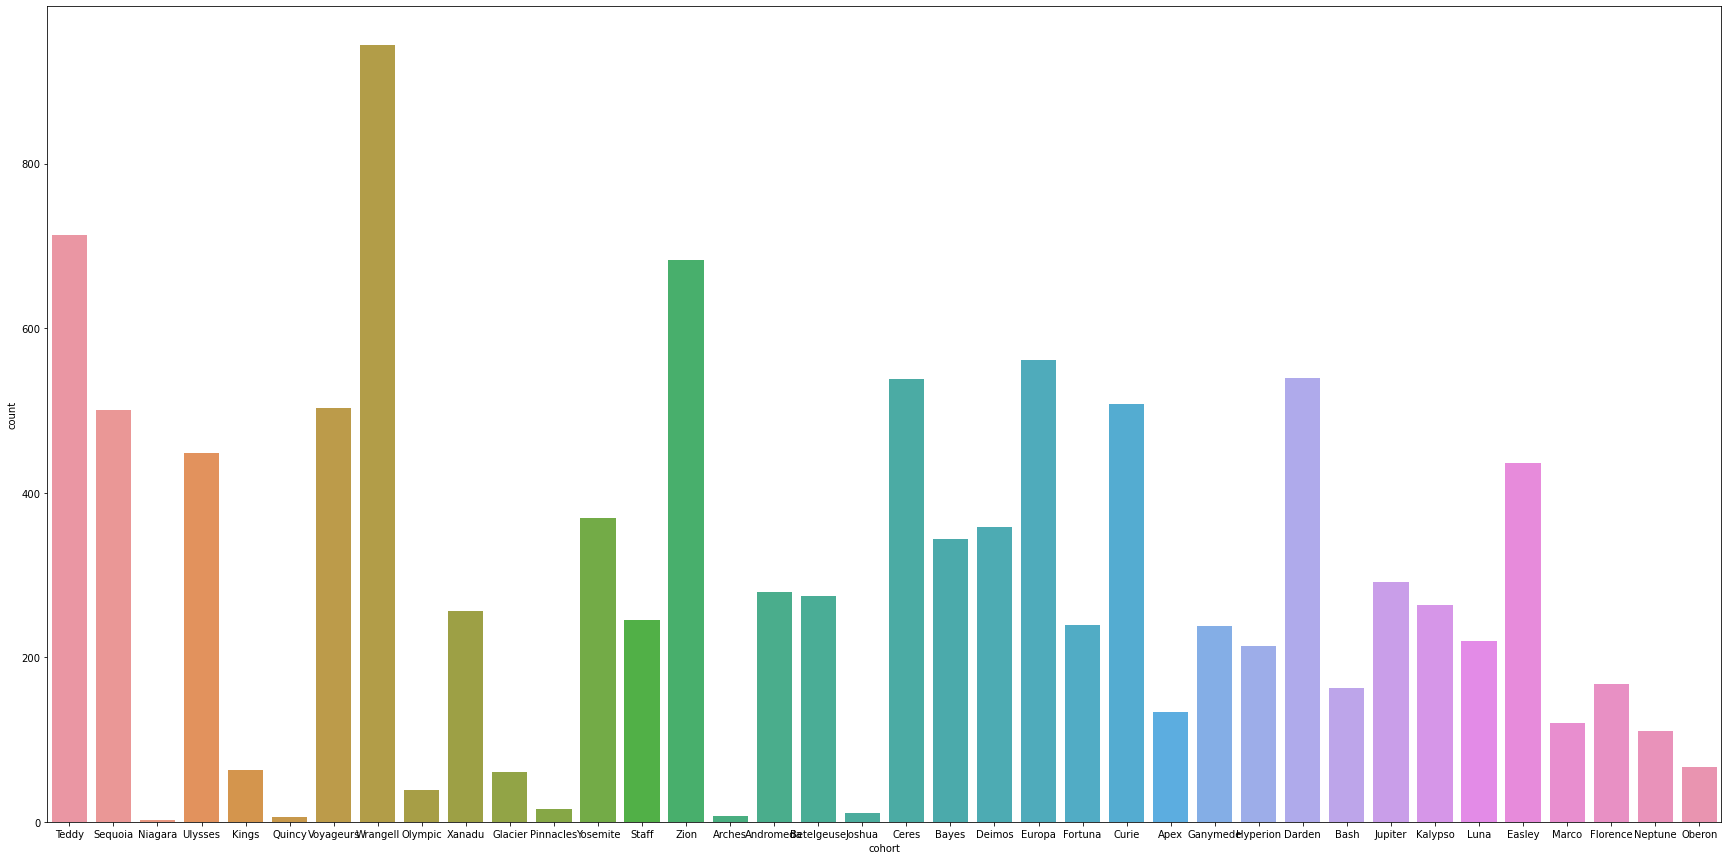

In [30]:
plt.figure(figsize=(30,15))
sns.countplot(x = least_active_students_df['cohort'])

<AxesSubplot:xlabel='program', ylabel='count'>

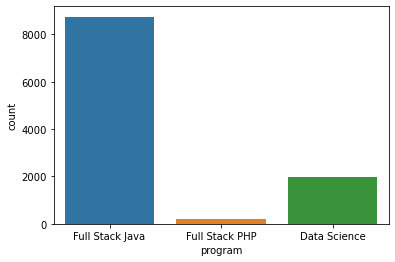

In [31]:
sns.countplot(x = least_active_students_df['program'])

In [32]:
least_active_students_df.user_id.value_counts()

254    328
228    286
843    272
437    234
226    219
      ... 
122      1
227      1
166      1
505      1
626      1
Name: user_id, Length: 523, dtype: int64

In [33]:
least_active_students_df.head()

,endpoint,user_id,cohort_id,ip,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,role,alumni,page,query
datetime,,,,,,,,,,,,,,,,
2018-01-26 12:20:36,javascript-i/javascript-with-html,34,22.0,209.205.123.242,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,javascript-with-html
2018-01-26 12:20:41,javascript-i/functions,34,22.0,209.205.123.242,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,functions
2018-01-26 16:00:29,javascript-i/introduction/working-with-data-ty...,34,22.0,209.205.123.242,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,introduction
2018-01-26 16:00:59,javascript-i/javascript-with-html,34,22.0,209.205.123.242,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,javascript-with-html
2018-01-26 16:02:16,javascript-i/functions,34,22.0,209.205.123.242,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full Stack Java,student,current,javascript-i,functions


In [ ]:
## lets take a closer look at full stack php and ful stack java 

In [ ]:
least_active_students_data_df = least_active_students_df.loc[least_active_students_df["program"] != 'Data Science']

In [ ]:
least_active_students_data_df

In [ ]:
least_active_students_data_df.program.value_counts()
#these are students in this program that view the curriculum less than 10 times!

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(x = least_active_students_data_df['cohort'])
#this plot shows the number of times some students from each cohort that view the curriculum

In [ ]:
least_active_students_PHP_df = least_active_students_data_df.loc[least_active_students_data_df["program"] != 'Full Stack Java']

In [ ]:
least_active_students_PHP_df

In [ ]:
least_active_students_PHP_df.user_id.value_counts().tail(20).plot.barh(figsize=(5,5))
#the diffrent user ids of the students who least view the curiculum 

In [ ]:
least_active_students_PHP_df.endpoint.value_counts().tail(15).plot.barh(figsize=(5,5))
#the least curriculum students who view 

Point one - most of the students who are not accessing the curriculm as often or less than 10 times are the full- stack java 
point two - there are a few ip's that are only accessing the curriculum once and thats it, thats a bit sus
    - look into the ips and find out where its coming from 

In [55]:

%%html
<div class='tableauPlaceholder' id='viz1661360022955' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;CodeupLogs&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CodeupLogs&#47;Dashboard1' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;CodeupLogs&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1661360022955');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='1800px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


## 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [ ]:
alumni_students_df = df.loc[df["alumni"] != '']
